## This script formats the magee_plus.csv file such that it can be read into BioXP for seeds

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import collections
import copy
import json

In [4]:
df = pd.read_csv("../data/seeds/magee_plus.csv")

In [5]:
df.dtypes

Species                object
Other names            object
KEGG ID                object
Waite 2009            float64
Magee 2017 LPSC       float64
Postberg 2018         float64
Waite 2017            float64
Postberg 2009         float64
Contains reactions      int64
dtype: object

In [6]:
df = df.fillna(0)

### Convert all elements to int 0 or 1

In [7]:
cols_to_convert = ["Waite 2009","Magee 2017 LPSC","Postberg 2018","Waite 2017","Postberg 2009"]

In [8]:
col_types = {}
for col in cols_to_convert:
    col_types[col] = "int64"

In [9]:
df

,Species,Other names,KEGG ID,Waite 2009,Magee 2017 LPSC,Postberg 2018,Waite 2017,Postberg 2009,Contains reactions
0,H2O,water,C00001,1.0,1.0,1.0,1.0,1.0,1
1,CO2,carbon dioxide,C00011,1.0,1.0,1.0,1.0,1.0,1
2,CH4,methane,C01438,1.0,1.0,1.0,1.0,1.0,1
3,NH3,ammonia,C00014,1.0,1.0,1.0,1.0,0.0,1
4,H2,hydrogen,C00282,1.0,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
64,SiO2,silica,C19572,0.0,0.0,0.0,1.0,0.0,0
65,H2O2,hydrogen peroxide,C00027,0.0,0.0,0.0,1.0,0.0,1
66,OH-,hydroxide ion,C01328,0.0,0.0,0.0,1.0,0.0,1
67,C2H3N,Acetonitrile,0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
len(set(df["Species"]))

68

In [11]:
len(list(df["Species"]))

69

In [12]:
collections.Counter(list(df["Species"]))

Counter({'H2O': 1,
         'CO2': 1,
         'CH4': 1,
         'NH3': 1,
         'H2': 1,
         'CO': 1,
         'N2': 1,
         'C2H2': 1,
         'HCN': 1,
         'C2H4': 1,
         'CH2O': 1,
         'C2H6': 1,
         'NO': 1,
         'C3H4': 1,
         'CH5N': 1,
         'C3H6': 1,
         'C2H3N': 2,
         'C3H8': 1,
         'C2H7N': 1,
         'C4H8': 1,
         'C2H6N2': 1,
         'C4H10': 1,
         'C4H9N': 1,
         'C5H10': 1,
         'C4H8N2': 1,
         'C5H12': 1,
         'C6H12N4': 1,
         'C8H18': 1,
         'O2': 1,
         'C2H7NO': 1,
         'CH3OH': 1,
         'C2H5NO2': 1,
         'C2H2O': 1,
         'C3H7NO2': 1,
         'C2H4O': 1,
         'C2H6O': 1,
         'C3H6O': 1,
         'C3H8O': 1,
         'C2H4O2': 1,
         'Ar': 1,
         'C2H6O2': 1,
         'H2S': 1,
         'C4H10O': 1,
         'PH3': 1,
         'C4H6O2': 1,
         'C3H5Cl': 1,
         '(C2H4)n': 1,
         'C6H6': 1,
         'H3PO4': 

Need to remove bottom acetonitrile

In [13]:
df = df.drop(axis="index",labels=67)

In [14]:
d = df.set_index("Species").to_dict("index")

Add column for Contains KEGGID

In [15]:
def contains_kegg(keggid):
    if keggid=="0":
        return 0
    else:
        return 1

In [16]:
df['Contains KEGGID'] = df.apply(lambda row: contains_kegg(row['KEGG ID']), axis=1)

In [17]:
df.head()

,Species,Other names,KEGG ID,Waite 2009,Magee 2017 LPSC,Postberg 2018,Waite 2017,Postberg 2009,Contains reactions,Contains KEGGID
0,H2O,water,C00001,1.0,1.0,1.0,1.0,1.0,1,1
1,CO2,carbon dioxide,C00011,1.0,1.0,1.0,1.0,1.0,1,1
2,CH4,methane,C01438,1.0,1.0,1.0,1.0,1.0,1,1
3,NH3,ammonia,C00014,1.0,1.0,1.0,1.0,0.0,1,1
4,H2,hydrogen,C00282,1.0,1.0,1.0,1.0,0.0,1,1


Add column for union if Contains KEGGID

In [18]:
def unify_papers(row,sources):
    if row["Contains KEGGID"] == 1:
        for source in sources:
            if row[source] == 1:
                return 1
    return 0        

In [21]:
sources = ['Waite 2009',
  'Magee 2017 LPSC',
  'Postberg 2018',
  'Waite 2017',
  'Postberg 2009']

In [22]:
df['Appears with KEGGID'] = df.apply(lambda row: unify_papers(row,sources), axis=1)

In [23]:
df

,Species,Other names,KEGG ID,Waite 2009,Magee 2017 LPSC,Postberg 2018,Waite 2017,Postberg 2009,Contains reactions,Contains KEGGID,Appears with KEGGID
0,H2O,water,C00001,1.0,1.0,1.0,1.0,1.0,1,1,1
1,CO2,carbon dioxide,C00011,1.0,1.0,1.0,1.0,1.0,1,1,1
2,CH4,methane,C01438,1.0,1.0,1.0,1.0,1.0,1,1,1
3,NH3,ammonia,C00014,1.0,1.0,1.0,1.0,0.0,1,1,1
4,H2,hydrogen,C00282,1.0,1.0,1.0,1.0,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
63,MgO,magnesium oxide,C12567,0.0,0.0,0.0,1.0,0.0,0,1,1
64,SiO2,silica,C19572,0.0,0.0,0.0,1.0,0.0,0,1,1
65,H2O2,hydrogen peroxide,C00027,0.0,0.0,0.0,1.0,0.0,1,1,1
66,OH-,hydroxide ion,C01328,0.0,0.0,0.0,1.0,0.0,1,1,1


Now I can start manipulating dict to check for how many compounds are shared between all papers, how many overlap with submitted version, how many have KEGG IDs, how many have reactions, etc...

In [24]:
sources_with_reactions = list(sources+["Contains reactions"])

In [25]:
sources_with_keggids = list(sources_with_reactions+["Contains KEGGID"])

In [26]:
sources_with_appears = list(sources_with_keggids+["Appears with KEGGID"])

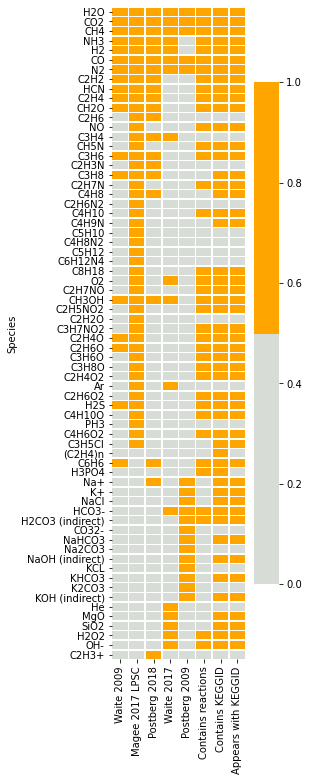

In [27]:
plt.figure(figsize=(3,12))
cmap = ["xkcd:light gray","orange"]
sns.heatmap(df.set_index("Species")[sources_with_appears],yticklabels=True,cbar=True,linewidths=.5,cmap=cmap)

Put sources into dict so I can write to JSON

In [28]:
d = df.set_index("Species").to_dict("index")

In [29]:
sources = ['Waite 2009',
  'Magee 2017 LPSC',
  'Postberg 2018',
  'Waite 2017',
  'Postberg 2009',
  'Contains reactions',
  'Contains KEGGID',
  'Appears with KEGGID']

In [30]:
papers_dict = {}
for s in sources:
    papers_dict[s] = list()
    for cpd in d:
        if d[cpd]["Appears with KEGGID"] == 1:
            if d[cpd][s] == 1:
                papers_dict[s].append(d[cpd]["KEGG ID"])

Add phosphate to all categories

In [31]:
papers_dict_p = {}
for k in papers_dict:
    papers_dict_p[k] = copy.deepcopy(papers_dict[k])
    papers_dict_p[k+" P"] = copy.deepcopy(papers_dict[k])
    papers_dict_p[k+" P"].append("C00009")

In [32]:
for k in papers_dict_p:
    assert(len(papers_dict_p[k])==len(set(papers_dict_p[k])))

Write JSON

In [163]:
# with open("../data/seeds/encel_papers_2019.json", 'w') as f:
#     parsed = json.dump(papers_dict_p,f,indent=2)

### Check a few things...

In [36]:
len(set(papers_dict["Contains KEGGID"]))

49

In [37]:
len(set(papers_dict["Contains reactions"]))

36

In [38]:
with open("../test/data/master_from_redges-og-submission.json") as f:
    master = json.load(f)

In [50]:
cpds_in_master_rxns = []
for r in master["reactions"]:
    cpds_in_master_rxns+=master["reactions"][r]["left"]
    cpds_in_master_rxns+=master["reactions"][r]["right"]

In [52]:
len(set(cpds_in_master_rxns))

8073

In [56]:
len(set(cpds_in_master_rxns) & set(papers_dict["Contains reactions"]))

36

In [62]:
len(set(papers_dict["Contains reactions"]) - set(cpds_in_master_rxns))

0

**from my fig8-11 spreadsheet of what cpds are in rxns**

In [57]:
encel_cpds_in_rxns = {'C00001',
 'C00007',
 'C00011',
 'C00014',
 'C00027',
 'C00041',
 'C00067',
 'C00132',
 'C00189',
 'C00218',
 'C00237',
 'C00266',
 'C00282',
 'C00283',
 'C00288',
 'C00469',
 'C00479',
 'C00533',
 'C00543',
 'C00697',
 'C00741',
 'C01059',
 'C01326',
 'C01328',
 'C01330',
 'C01353',
 'C01380',
 'C01387',
 'C01407',
 'C01438',
 'C01548',
 'C05979',
 'C06142',
 'C06547',
 'C06548',
 'C11505',
 'C20783',
 'C21390'}

In [63]:
encel_cpds_in_rxns - set(papers_dict["Contains reactions"])

{'C01330', 'C20783'}

In [66]:
encel_cpds_in_rxns - set(cpds_in_master_rxns)

set()

In [65]:
master["reactions"]["R04347"]

{'left': ['C01330', 'C01330', 'C04488', 'C03576'],
 'right': ['C01330', 'C01330', 'C01217', 'C03920'],
 'metadata': {}}

In [67]:
master["reactions"]["R10702"]

{'left': ['C20783', 'C00004', 'C00080', 'C00007'],
 'right': ['C01845', 'C00003', 'C00001'],
 'metadata': {}}

> Ok, i think this is a good thing because I didn't use my own manual curated list of reactions which could (did) have errors, instead I wrote a code to find all kegg ids which were in my master

> THERE ARE 38 COMPOUNDS EXCLUDING PHOSPHATE THAT ARE PART OF MY ENCELADUS SEED SET WHICH ARE INVOLVED IN KEGG REACTIONS (FOR THE VERSION OF KEGG THAT I'M USING). THAT IS THE 100% CORRECT NUMBER

> I HAVE NOW UPDATED THE `MAGEE_PLUS.CSV` THAT'S ON MY MACBOOKPRO DESKTOP

#### But now I should check--why do I have 49 (non-phospate) compounds with kegg-ids in my desktop magee_plus but 49 in the dict above?

> I'm stupid, they're the same! 

In [68]:
set(papers_dict["Contains KEGGID"])

{'C00001',
 'C00007',
 'C00011',
 'C00014',
 'C00027',
 'C00041',
 'C00067',
 'C00132',
 'C00189',
 'C00218',
 'C00237',
 'C00238',
 'C00266',
 'C00282',
 'C00283',
 'C00288',
 'C00469',
 'C00479',
 'C00533',
 'C00543',
 'C00697',
 'C00741',
 'C01059',
 'C01326',
 'C01328',
 'C01330',
 'C01353',
 'C01380',
 'C01387',
 'C01407',
 'C01438',
 'C01548',
 'C05979',
 'C06142',
 'C06547',
 'C06548',
 'C11505',
 'C12244',
 'C12567',
 'C12568',
 'C12569',
 'C12603',
 'C13563',
 'C17390',
 'C18606',
 'C19316',
 'C19572',
 'C20783',
 'C21390'}

In [72]:
contains_kegg_id_from_current_csv = {"C00001",
"C00007",
"C00011",
"C00014",
"C00027",
"C00041",
"C00067",
"C00132",
"C00189",
"C00218",
"C00237",
"C00238",
"C00266",
"C00282",
"C00283",
"C00288",
"C00469",
"C00479",
"C00533",
"C00543",
"C00697",
"C00741",
"C01059",
"C01326",
"C01328",
"C01330",
"C01353",
"C01380",
"C01387",
"C01407",
"C01438",
"C01548",
"C05979",
"C06142",
"C06547",
"C06548",
"C11505",
"C12244",
"C12567",
"C12568",
"C12569",
"C12603",
"C13563",
"C17390",
"C18606",
"C19316",
"C19572",
"C20783",
"C21390"}

In [73]:
len(set(contains_kegg_id_from_current_csv))

49

In [74]:
set(contains_kegg_id_from_current_csv)- set(papers_dict["Contains KEGGID"])

set()

### Try to do fixed 5 plus variable choose 5

In [79]:
import itertools

In [92]:
fixed_5 = {'C00001',
 'C00007',
 'C00011',
 'C00014',
 'C00282'}

In [82]:
variable_5_combos = [i for i in itertools.combinations(encel_cpds_in_rxns - fixed_5,5)]

In [105]:
variable_10_combos = [list(set(i)|fixed_5) for i in variable_5_combos]

In [106]:
len(variable_5_combos)

237336

In [107]:
len(variable_10_combos)

237336

In [109]:
with open('all_5_plus_5_combos.json', 'w') as f:
    json.dump(variable_10_combos, f)